In [4]:
import pandas as pd
import yfinance as yf
import pickle

import matplotlib.pyplot as plt
%matplotlib inline


In [55]:
import mlflow 

mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('first_exp')
mlflow.autolog()


<Experiment: artifact_location='/home/timur/work_hub/mlops_zoomcamp2023/Final_project/mlruns/1', creation_time=1690827882330, experiment_id='1', last_update_time=1690827882330, lifecycle_stage='active', name='first_exp', tags={}>

#### Loading S&P 500 data

In [2]:
sp500 = yf.Ticker('^GSPC')

In [3]:
sp500 = sp500.history(period = 'max')

In [4]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


#### Vizualizing S&P500 data

<Axes: xlabel='Date'>

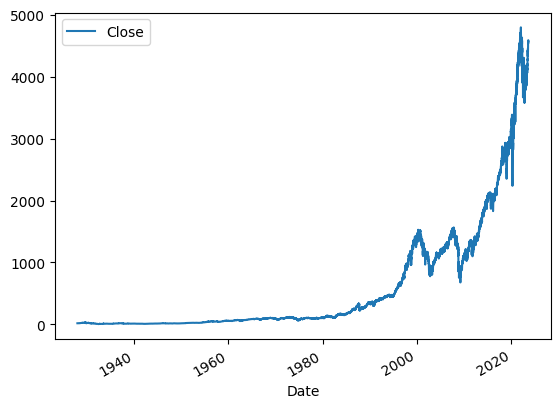

In [5]:
sp500.plot.line(y = 'Close', use_index = True)

#### Delete extra columns

In our dataset we have extra columns 'Dividends' and 'Stock Splits'. So we have do delete them

In [6]:
del sp500['Dividends']
del sp500['Stock Splits']

In [7]:
sp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


#### Add new columns 'Tomorrow'

In this project I'm going to compare value of SP&500 index in particular day with same value tomorrow day. That's why I have to add new columns 'Tomorrow. Then compare values between today and tomorrow and this will be my 'Target' for this project.  

In [8]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [9]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


#### Creating Target columns

In [10]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [11]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


#### Cut dataset

In the dataset sp500 we have data of SP500 index values for the period 1927 - 2023. Firstly I would like to focus on shorter data period. Let's consider period from 1990 to 2023

In [12]:
sp500 = sp500.loc['1990-01-01':].copy()

#### Save dataset to csv file and put it in Data directory

In [13]:
sp500.to_csv('/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/sp500_data.csv')

#### Split data

In this project I use time series data. So I can't use cross validation method for splitting my dataset on train and test. That's why I split it in the following way: all the data except last 100 days will be my train dataset and last 100 days data will be test dataset. 

In [14]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

#### Save train and test datasets

In [15]:
train.to_csv('/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/train_data.csv')

In [16]:
test.to_csv('/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/test_data.csv')

#### Pick features
I pick columns 'Close', 'Volume', 'Open', 'High', 'Low' as a features

In [17]:
features = ['Close', 'Volume', 'Open', 'High', 'Low']

#### Pick a model and fit it
I use RandomForestClassifier as a base model for my project. But I'm going to use different parameters for my model, so I'll label it as a model_1, model_2 etc.


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model_1 = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

In [20]:
model_1.fit(train[features], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

#### Evaluating the quality of a model

As a metric for evaluating the quality of a model I'm going to use precision_score metric.It measures the model's precision in predicting positive classes among all predicted positive classes.

In that particular project precision_score metric show what percentage of the time when we say that market go up it's really go up

In [21]:
from sklearn.metrics import precision_score 

#### Prediction

In [22]:
preds = model_1.predict(test[features])

In [23]:
preds

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### It's hard to work with numpy so let's turn it to pandas Series

In [24]:
preds = pd.Series(preds, index = test.index)

In [25]:
preds

Date
2023-03-09 00:00:00-05:00    0
2023-03-10 00:00:00-05:00    0
2023-03-13 00:00:00-04:00    0
2023-03-14 00:00:00-04:00    1
2023-03-15 00:00:00-04:00    0
                            ..
2023-07-26 00:00:00-04:00    1
2023-07-27 00:00:00-04:00    1
2023-07-28 00:00:00-04:00    1
2023-07-31 00:00:00-04:00    1
2023-08-01 00:00:00-04:00    1
Length: 100, dtype: int64

### Обратите внимание, что для правильной интерпретации метрики precision_score рекомендуется также рассматривать ее вместе с другими метриками, такими как полнота (recall), F1-мера и матрица ошибок (confusion matrix), чтобы получить более полное представление о производительности классификационной модели.

#### Calculate precision score

In [53]:
accuracy = precision_score(test['Target'], preds)

In [54]:
accuracy

0.5964912280701754

#### Mlflow tracking

In [70]:
with mlflow.start_run():
        
    mlflow.set_tag('developer', 'Timur')
    mlflow.set_tag('model', 'RandomForestClassifier')
    mlflow.set_tag('type', 'without_backtesting')
    
    mlflow.log_param('train-data-path', '/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/train_data.csv')
    mlflow.log_param('test-data-path', '/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/test_data.csv')
    
    n_estimators = 100
    min_samples_split = 100
    random_state = 1

    mlflow.log_param('n_estimators', n_estimators)
    mlflow.log_param('min_samples_split', min_samples_split)
    mlflow.log_param('random_state', random_state)
    
    model_1 = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=random_state)
    model_1.fit(train[features], train['Target'])
                    
    preds = model_1.predict(test[features])                 
    accuracy = precision_score(test['Target'], preds)
    mlflow.log_metric('accuracy', accuracy)
    

    

2023/08/02 15:02:31 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/08/02 15:02:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/08/02 15:02:35 WARNING mlflow.utils.autologgin

#### Intermediate conclusion

The RandomForestClassifier model has a fairly high precision in predicting positive classes (for example, classes with label 1). This means that among the objects that the model classified as positive, about 61% are actually positive.

However, to fully evaluate the performance of a model, other metrics such as recall and F1 score must also be considered. Precision is only one of the metrics and may not give a complete picture of the quality of the model.

#### Save model_1

In [27]:
with open('/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Models/random_forest_model_1.pkl', 'wb') as f_out:
    pickle.dump(model_1, f_out)

#### Improving result

Not bad, not bad. But let's try improve that

First of all, let's combined our test target with prediction target to see how accurate it is

In [28]:
combined = pd.concat([test['Target'], preds], axis = 1)

In [29]:
combined

,Target,0
Date,,
2023-03-09 00:00:00-05:00,0,0
2023-03-10 00:00:00-05:00,0,0
2023-03-13 00:00:00-04:00,1,0
2023-03-14 00:00:00-04:00,0,1
2023-03-15 00:00:00-04:00,1,0
...,...,...
2023-07-26 00:00:00-04:00,0,1
2023-07-27 00:00:00-04:00,1,1
2023-07-28 00:00:00-04:00,1,1


#### Create a plot

<Axes: xlabel='Date'>

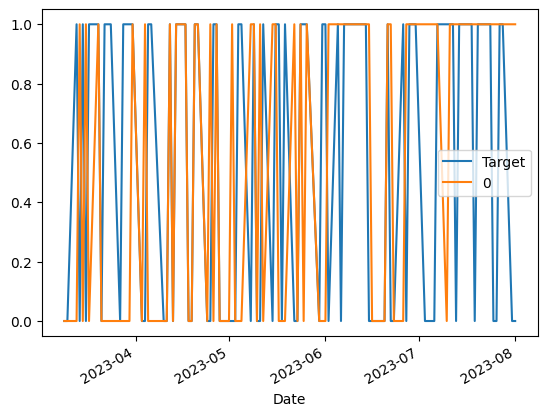

In [30]:
combined.plot()

We see that model work quite good for prediction when the market go up, but less accurate when the market go down

#### Backtesting

Earlier I test my model against only last 100 days. But in real life it's make sense to test stock price model across multiply years. 

That's why I'm going to create 2 function for create backtesting system. 

The first step is create predict function to wrap up everything what I did earlier in one place

In [31]:
def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict(test[features])
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined
    

Then I create backtest function. I use arguments like 'start' and 'step'. There's what does it mean. 

We have approximately 250 trading days in one year. So I set set start like 2500 what means that I take data for the last 10 years and test it for the next(eleven) years (and for that reason I use step equal 250).

So the 'train' dataset include all year prior to the current year, and 'test' dataset is current year

In [32]:
def backtest(data, model, features, start = 2500, step = 250):
    all_predictors = []
    
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        # use def predict for generate predictions
        predictions = predict(train, test, features, model)
        all_predictors.append(predictions)
        
    return pd.concat(all_predictors)

In [33]:
predictions = backtest(sp500, model_1, features)

#### Analyse result

Firtsly let's see how many times the Market goes up versus down

In [34]:
predictions['Predictions'].value_counts()

Predictions
0    3433
1    2527
Name: count, dtype: int64

In [35]:
predictions

,Target,Predictions
Date,,
1999-11-22 00:00:00-05:00,0,0
1999-11-23 00:00:00-05:00,1,0
1999-11-24 00:00:00-05:00,0,0
1999-11-26 00:00:00-05:00,0,0
1999-11-29 00:00:00-05:00,0,0
...,...,...
2023-07-26 00:00:00-04:00,0,1
2023-07-27 00:00:00-04:00,1,1
2023-07-28 00:00:00-04:00,1,1


In [36]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5302730510486743

#### Mlflow

In [71]:
with mlflow.start_run():
    
    mlflow.set_tag('developer', 'Timur')
    mlflow.set_tag('model', 'RandomForestClassifier')
    mlflow.set_tag('type', 'with_backtesting')
    
    mlflow.log_param('train-data-path', '/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/train_data.csv')
    mlflow.log_param('test-data-path', '/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/test_data.csv')
    
    n_estimators = 100
    min_samples_split = 100
    random_state = 1

    mlflow.log_param('n_estimators', n_estimators)
    mlflow.log_param('min_samples_split', min_samples_split)
    mlflow.log_param('random_state', random_state)
    
    predictions = backtest(sp500, model_1, features)                 
    accuracy = precision_score(predictions['Target'], predictions['Predictions'])
    mlflow.log_metric('accuracy', accuracy)

    with open('/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Models/preprocessor.b', 'wb') as f_out:
        pickle.dump(model_1, f_out)
    mlflow.log_artifact("/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Models/preprocessor.b", artifact_path='preprocessor')
    mlflow.sklearn.log_model(model_1, artifact_path=None)

2023/08/02 15:03:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/08/02 15:03:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packa

2023/08/02 15:03:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 8946cc2aec5641d4af65698604b867ca. Failed operations: [MlflowException("Changing param values is not allowed. Params were already logged=\'[{\'key\': \'min_samples_split\', \'old_value\': \'100\', \'new_value\': \'50\'}, {\'key\': \'n_estimators\', \'old_value\': \'100\', \'new_value\': \'200\'}]\' for run ID=\'8946cc2aec5641d4af65698604b867ca\'.")]')]
2023/08/02 15:03:48 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, i

2023/08/02 15:04:05 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/08/02 15:04:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packa

2023/08/02 15:04:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packages/mlflow/models/signature.py:152: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2023/08/02 15:04:33 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged succe

2023/08/02 15:04:55 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under /home/timur/work_hub/mlops_zoomcamp2023/Final_project/mlruns/1/8946cc2aec5641d4af65698604b867ca/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/08/02 15:04:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 8946cc2aec5641d4af65698604b867ca. Failed operations: [MlflowException("Changing param values is not allowed. Params were already logged=\'[{\'key\': \'min_samples_split\', \'old_value\': \'100\', \'new_value\': \'50\'}, {\'key\': \'n_estimators\', \'old_value\': \'100\', \'new_value\': \'200\'}]\' for run ID=\'8946cc2aec5641d4af65698604b867

2023/08/02 15:05:17 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 8946cc2aec5641d4af65698604b867ca. Failed operations: [MlflowException("Changing param values is not allowed. Params were already logged=\'[{\'key\': \'min_samples_split\', \'old_value\': \'100\', \'new_value\': \'50\'}, {\'key\': \'n_estimators\', \'old_value\': \'100\', \'new_value\': \'200\'}]\' for run ID=\'8946cc2aec5641d4af65698604b867ca\'.")]')]
2023/08/02 15:05:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/timur/.local/lib/python3.8/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, i

#### We get result. It's shows us that when we predict that market go up it was true in 53% cases

#### As a benchmark we can look at how actually sp500 run out

In [37]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.534228
0    0.465772
Name: count, dtype: float64

This result shows us that 53% times sp500 goes up and 46% time goes down

#### Add new features

Let's add more predictors for improvement our model


We calculate mean price for the last 2, 5, 60, 250, 1000 trading days and compare with current price.Thus we give our algoritms more information for better prediction

In [38]:
horizons = [2, 5, 60, 250, 1000]

In [39]:
new_predictors = []

for horizon in horizons:
    # calculate rolling average
    rolling_averages = sp500.rolling(horizon).mean() 
    ratio_column = f'Close_Ration_{horizon}'
    # ratio between today close price and 2, 5, 60, 250, 1000 trading days
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close'] 
    
    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]
    

In [40]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see that there are a lot of missing values, because when pandas can't find data for prior days it shows NaN value. According to this reason we have to drop NaN

In [41]:
sp500 = sp500.dropna()

In [42]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ration_2,Trend_2,Close_Ration_5,Trend_5,Close_Ration_60,Trend_60,Close_Ration_250,Trend_250,Close_Ration_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


### Update base model

In [43]:
model_2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [44]:
test.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-03-09 00:00:00-05:00,3998.659912,4017.810059,3908.699951,3918.320068,4445260000,3861.590088,0
2023-03-10 00:00:00-05:00,3912.770020,3934.050049,3846.320068,3861.590088,5518190000,3855.760010,0
2023-03-13 00:00:00-04:00,3835.120117,3905.050049,3808.860107,3855.760010,6558020000,3919.290039,1
2023-03-14 00:00:00-04:00,3894.010010,3937.290039,3873.629883,3919.290039,5665870000,3891.929932,0
2023-03-15 00:00:00-04:00,3876.739990,3894.260010,3838.239990,3891.929932,6594010000,3960.280029,1


### Change our improve function

Next I try to improve my predict function. I want to have more control on what does it mean when model return 1 or 0. So I use predict_proba and set that when probabillity that sp500 goes up >= 0.6 model have to return 1, in other case - 0. 

It's action actually reduce our trading days, when we are suppose to trade, but increas a chance that price really goes up. And basically it's what we want to do - we don't want trad every single day, we want trade only the day when we are confident in a result

In [45]:
def predict(train, test, features, model):
    model_2.fit(train[features], train['Target'])
    preds = model_2.predict_proba(test[features])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined
    

In [46]:
predictions = backtest(sp500, model_2, new_predictors)

In [47]:
predictions['Predictions'].value_counts()

Predictions
0.0    4142
1.0     817
Name: count, dtype: int64

#### So we get another distribution of counts when markets go up and down than previously. It's because we early set out threshold equal 0.6. And now we're going to trade less count of days then previously and hopefully we'll be more accurate

In [48]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5691554467564259

In [72]:
with mlflow.start_run():
    
    mlflow.set_tag('developer', 'Timur')
    mlflow.set_tag('model', 'RandomForestClassifier')
    mlflow.set_tag('type', 'add_ma_feature')
    
    mlflow.log_param('train-data-path', '/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/train_data.csv')
    mlflow.log_param('test-data-path', '/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Data/test_data.csv')
    
    n_estimators = 200
    min_samples_split = 50
    random_state = 1

    mlflow.log_param('n_estimators', n_estimators)
    mlflow.log_param('min_samples_split', min_samples_split)
    mlflow.log_param('random_state', random_state)
    
    predictions = backtest(sp500, model_2, new_predictors)
    accuracy = precision_score(predictions['Target'], predictions['Predictions'])
    mlflow.log_metric('accuracy', accuracy)
    

2023/08/02 15:07:48 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under /home/timur/work_hub/mlops_zoomcamp2023/Final_project/mlruns/1/59e1f36454e443ed9bb735340f1bfd4b/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/08/02 15:07:53 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under /home/timur/work_hub/mlops_zoomcamp2023/Final_project/mlruns/1/59e1f36454e443ed9bb735340f1bfd4b/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/08/02 15:07:59 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under /home/timur/work_hub/mlops_zoomcamp2023/Final_project/mlruns/1/59e1f36454

#### We get a result which actually more accurate than our base line. Of course we can work with this model or use another and look at result.

#### Save our second model_2

In [50]:
with open('/home/timur/work_hub/mlops_zoomcamp2023/Final_project/Models/random_forest_model_2.pkl', 'wb') as f_out:
    pickle.dump(model_2, f_out)